# FINAL PROJECT 3 :  Ensemble
- Nama : Roiqhatul Inayah
- Kode Peserta : PYTN-KS015-020
- Batch : 4

# GROUP 2
1. Diva Alvania
2. Gusti Salsatin
3. Roiqhatul Inayah

# OUTLINE :


1. Perkenalan
2. Pustaka yang Dibutuhkan
3. Data Loading 
4. Data Cleaning
5. Eksplorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Evaluasi Model
9. Model Inference
10. Kesimpulan 

# 1. PERKENALAN
## - Latar Belakang
Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet dan obesitas yang tidak sehat, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi. Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.

## - Dataset
Dataset ini terdiri dari 13 atribut dengan 299 rows. Dalam kasus ini target dari hasil prediksi keselamatan pasien dari penyakit jantung adalah DEATH_EVENT atau kematian

- Age: Umur Pasien
- Anaemia: Apakah Ada Pengurangan Haemoglobin
- Creatinine_phosphokinase: Level Enzim CPK Dalam Mcg/L
- Diabetes: Apakah Pasien Punya Riwayat Diabetes
- Ejection_fraction: Persentase Darah Yang Meninggalkan Jantung Dalam Persentasi Di Setiap Kontraksi Jantung
- High_blood_pressure: Apakah Pasien Punya Darah Tinggi
- Platelets: Jumlah Platelet Di Darah Dalam Kiloplatelets/ML
- Serum_creatinine: Level Serum Creatinine Di Darah Dalam Mg/DL
- Serum_sodium: Level Serum Sodium Di Darah Dalam MEq/L
- Sex: Apakah Pasien Pria Atau Wanita
- Smoking: Apakah Pasien Merokok
- Time: Waktu Dalam Hari Untuk Follow-Up
- DEATH_EVENT: Apakah Pasien Sudah Meninggal Saat Waktu Follow-Up

## - Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:

1. Mampu Memahami Konsep Classification Dengan Ensemble Model
2. Mampu Mempersiapkan Data Untuk Digunakan Dalam Ensemble Model
3. Mampu Mengimplementasikan Ensemble Model Untuk Membuat Prediksi

# 2. PUSTAKA YG DIBUTUHKAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Model Evaluation
from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings("ignore")

random_state=0

# Style Text
bold = '\033[1m'
normal = '\033[0m'

# 3. Data Loading
## - Import Data

In [2]:
# Mengambil Data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Untuk melihat isi kolom tanpa batasan
pd.set_option("display.max.columns", None)

## - Load Dataset

In [3]:
# Melihat 5 data paling atas
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Melihat 5 data terbawah
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## - Inspection of the amount of data held
### a. Checking Row of Dataset

In [5]:
# Mendata Jumlah banyak data (baris)
len(df)

299

### b. Checking Column of Dataset

In [6]:
# Mendata Jumlah banyaknya Kolom Pada Data
len(df.columns)

13

**Kesimpulan:** Dari data tersebut di dapatkan jumlah baris terdiri dari  299  dan jumlah kolom berjumlah  13

## -Missing value inspection

In [7]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
age,0,0.0 %
anaemia,0,0.0 %
creatinine_phosphokinase,0,0.0 %
diabetes,0,0.0 %
ejection_fraction,0,0.0 %
high_blood_pressure,0,0.0 %
platelets,0,0.0 %
serum_creatinine,0,0.0 %
serum_sodium,0,0.0 %
sex,0,0.0 %


**Kesimpulan:** Dari hasil pengecekan missing value di dapatkan hasil yaitu tidak terdapat missing value pada setiap atribut

## - Checking Unique Value

In [8]:
nunique_col = df.nunique().sort_values(ascending=False)
nunique_col = pd.DataFrame(nunique_col, columns = ["jumlah"])
nunique_col

,jumlah
creatinine_phosphokinase,208
platelets,176
time,148
age,47
serum_creatinine,40
serum_sodium,27
ejection_fraction,17
anaemia,2
diabetes,2
high_blood_pressure,2


## - Checking Type of Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Kesimpulan:** Dari pengecekan tipe data pada dataset, diketahui terdapat 2 tipe data yaitu:

## - Describe Data

In [10]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

age : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
  
  
anaemia : 
0    170
1    129
Name: anaemia, dtype: int64
  
  
creatinine_phosphokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
  
  
diabetes : 
0    174
1    125
Name: diabetes, dtype: int64
  
  
ejection_fr

# 4. Data Cleaning
## - Data Inspection
### a. Checking Duplicate Data

In [12]:
df.duplicated().sum()

0

**Kesimpulan:** Dari hasil pengecekan Data Duplicate di dapatkan hasil yaitu tidak terdapat Data yang sama (Duplicate)

### b. Checking missing Value Data on target data

In [13]:
df['DEATH_EVENT'].isnull().sum()

0

**Kesimpulan:** Dari hasil pengecekan Missing Value di dapatkan hasil yaitu tidak terdapat Missing Value pada data target

## - Change and Cheking
### a. Change Column Name

In [14]:
df = df.rename(columns={
    'age':'usia',
    'creatinine_phosphokinase':'creatinin_fosfokinase', 
    'ejection_fraction':'fraksi_ejeksi', 
    'high_blood_pressure':'tekanan_darah_tinggi', 
    'serum_creatinine':'kreatinin_serum', 
    'serum_sodium':'sodium_serum',
    'sex':'jenis_kelamin',
    'smoking':'perokok',
    'DEATH_EVENT':'kematian'
})

Mengubah nama kolom pada data agar mempermudah dalam pengerjaan, berikut ini nama kolom yang diubah pada project ini:

- 'age':'usia',
- 'creatinine_phosphokinase':'creatinin_fosfokinase',
- 'ejection_fraction':'fraksi_ejeksi',
- 'high_blood_pressure':'tekanan_darah_tinggi',
- 'serum_creatinine':'kreatinin_serum',
- 'serum_sodium':'sodium_serum',
- 'sex':'jenis_kelamin',
- 'smoking':'perokok',
- 'DEATH_EVENT':'kematian'

### b. Checking Column Name

In [15]:
df.head(5)

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## - Copy Previous Data
### a. Copy Data

In [16]:
df_copy = df.copy()

### b. Checking Data

In [17]:
df_copy.head(5)

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 5. EKSPLORASI DATA
## - Describe and Visualization Data
### a. Describe Data

In [18]:
df_copy.describe()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Dari hasil descriptive data dapat disimpulkan sebagai berikut:

#### Usia
- Rata-rata Usia pada Pasien Penyakit Jantung berkisar 60 Tahun
- Usia terendah pada Pasien Penyakit Jantung berada pada umur 40 Tahun
- Usia tertinggi pada Pasien Penyakit Jantung berada pada umur 95 Tahun

#### Anemia
- Rata-rata nilai Anemia pada Pasien Penyakit Jantung berada di 0.431438
- Anemia terendah pada Pasien Penyakit Jantung berada di 0
- Anemia tertinggi pada Pasien Penyakit Jantung berada di 1.0

#### Creatinin Fosfokinase
- Rata-rata Creatinin Fosfokinase pada Pasien Penyakit Jantung berada di 581.839465
- Creatinin Fosfokinase terendah pada Pasien Penyakit Jantung berada di 23.00
- Creatinin Fosfokinase tertinggi pada Pasien Penyakit Jantung berada di 7861.00

#### Diabetes
- Rata-rata nilai Diabetes pada Pasien Penyakit Jantung berada di 0.418060
- Diabetes terendah pada Pasien Penyakit Jantung berada di 0
- Diabetes tertinggi pada Pasien Penyakit Jantung berada di 1.0

#### Fraksi Ejeksi
- Rata-rata Fraksi Ejeksi pada Pasien Penyakit Jantung berada di 38.083612
- Fraksi Ejeksi terendah pada Pasien Penyakit Jantung berada di 14.00
- Fraksi Ejeksi tertinggi pada Pasien Penyakit Jantung berada di 80.00

#### Tekanan Darah Tinggi
- Rata-rata nilai Tekanan Darah Tinggi pada Pasien Penyakit Jantung berada di 0.351171
- Tekanan Darah Tinggi terendah pada Pasien Penyakit Jantung berada di 0
- Tekanan Darah Tinggi tertinggi pada Pasien Penyakit Jantung berada di 1.0

### b. Visualization Data - Histogram of Distribution Columns

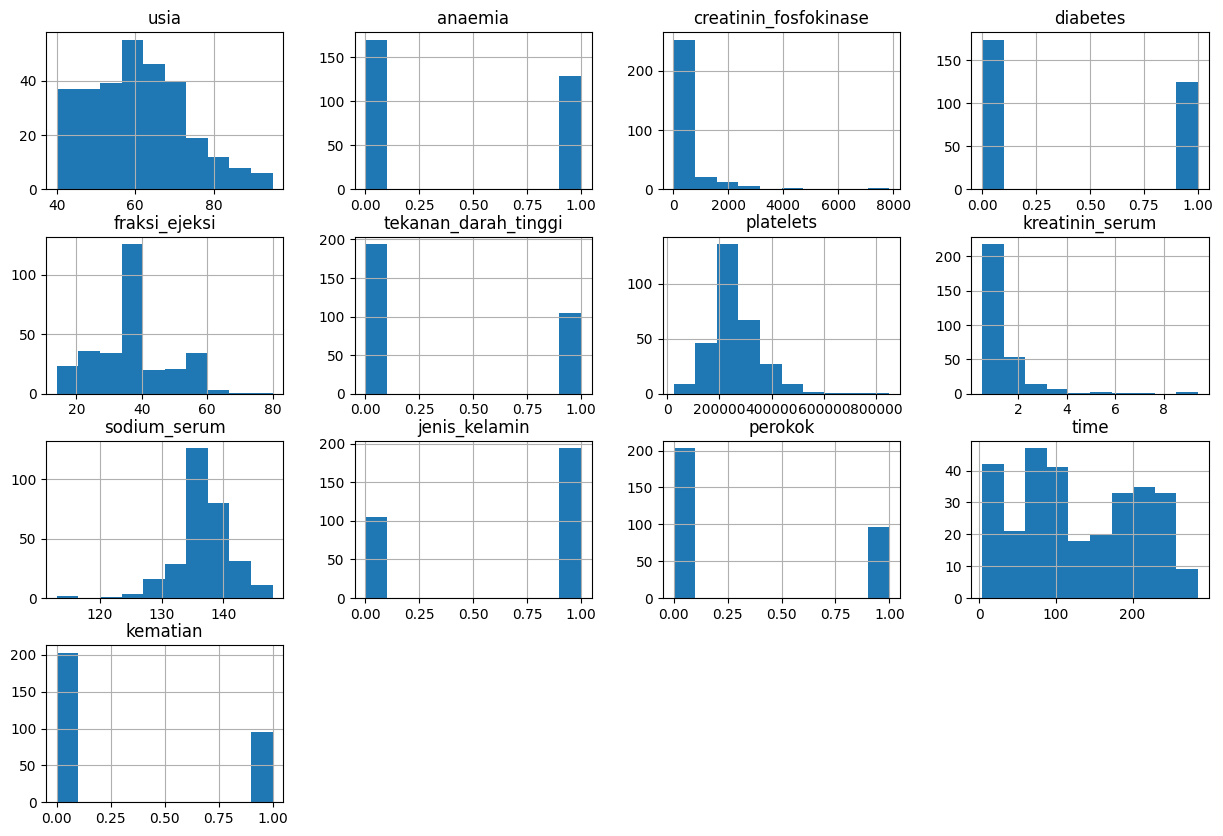

In [19]:
df_copy.hist(figsize=(15,10));

# Save Plot
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [20]:
def visualisasi_distribusi_data(data_df, features, targetName='kematian', targetLabel=['No','Yes']):
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data_df[col][data_df[targetName]==0],
            label=targetLabel[0]+" :"+" Skew = " +
            str(np.round(data_df[col][data_df[targetName] == 0].skew(), 2)),
            kde=True,
            color='g',
            stat="density",
            linewidth=0
        )
        sns.histplot(
            data_df[col][data_df[targetName]==1],
            label=targetLabel[1]+" :"+" Skew = " +
            str(np.round(data_df[col][data_df[targetName] == 1].skew(), 2)),
            kde=True,
            color='b',
            stat="density",
            linewidth=0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data_df[targetName],
            y = data_df[col],
            hue = data_df[targetName])
        plt.subplot(133)
        stats.probplot(x=data_df[col], plot=plt)
        plt.tight_layout()
        plt.show()

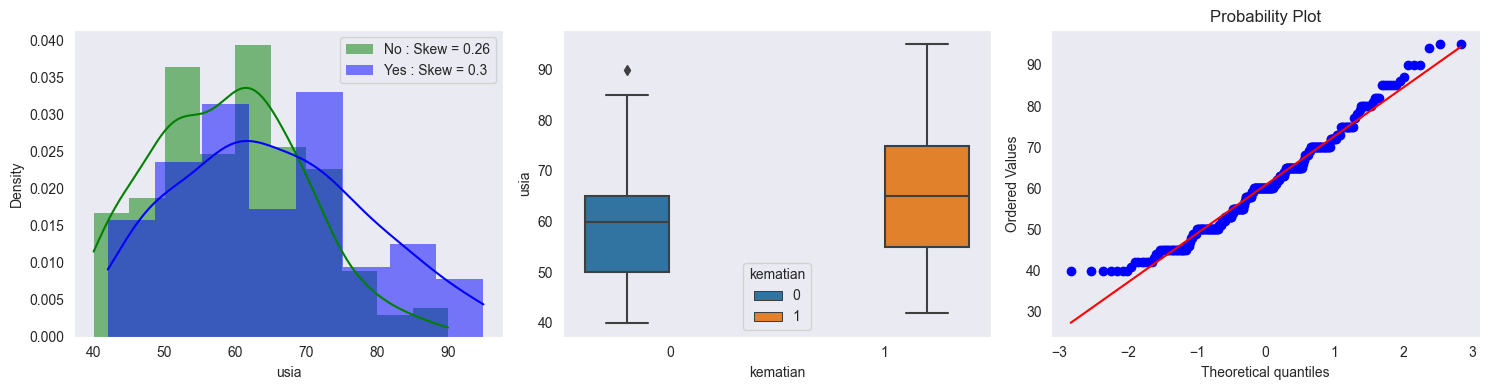

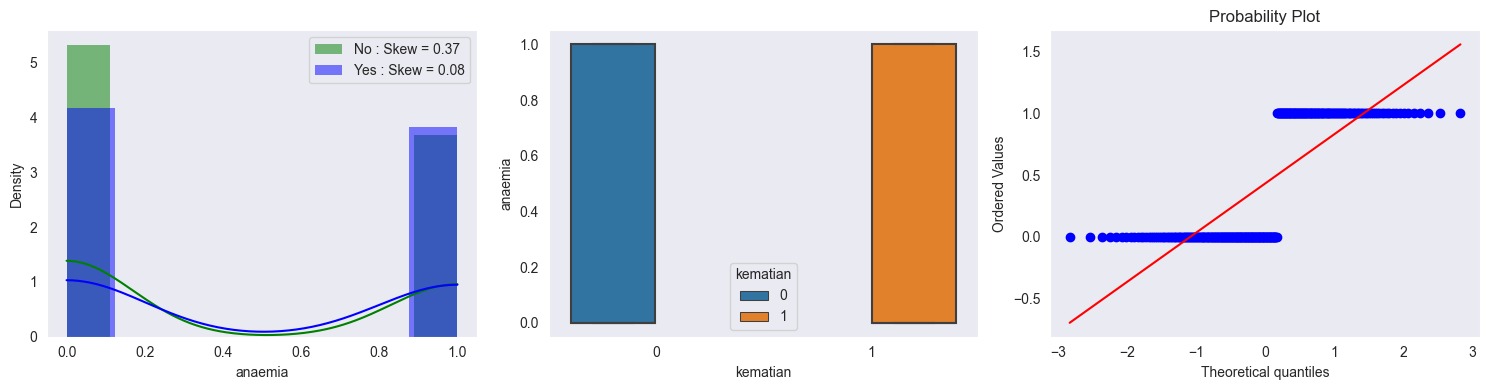

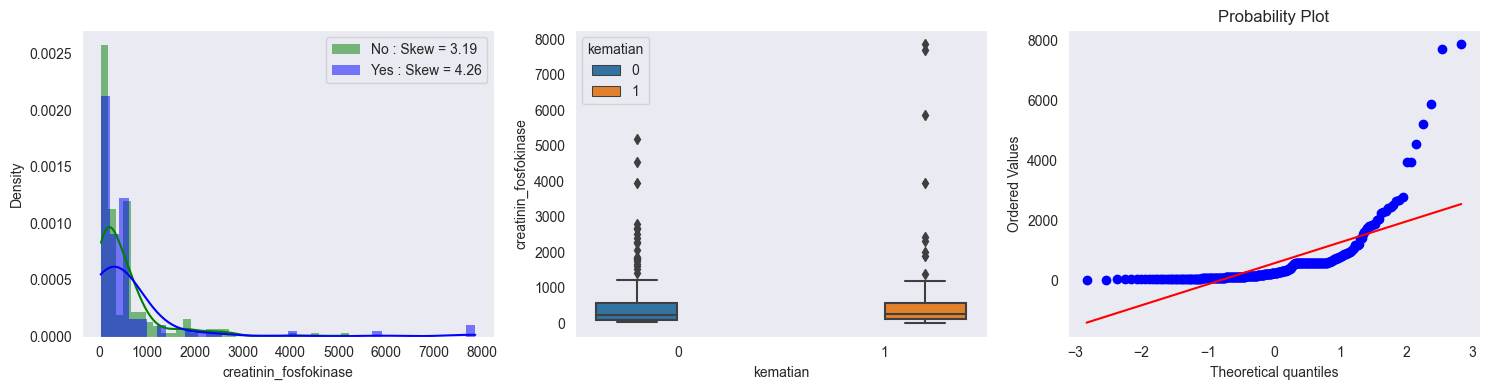

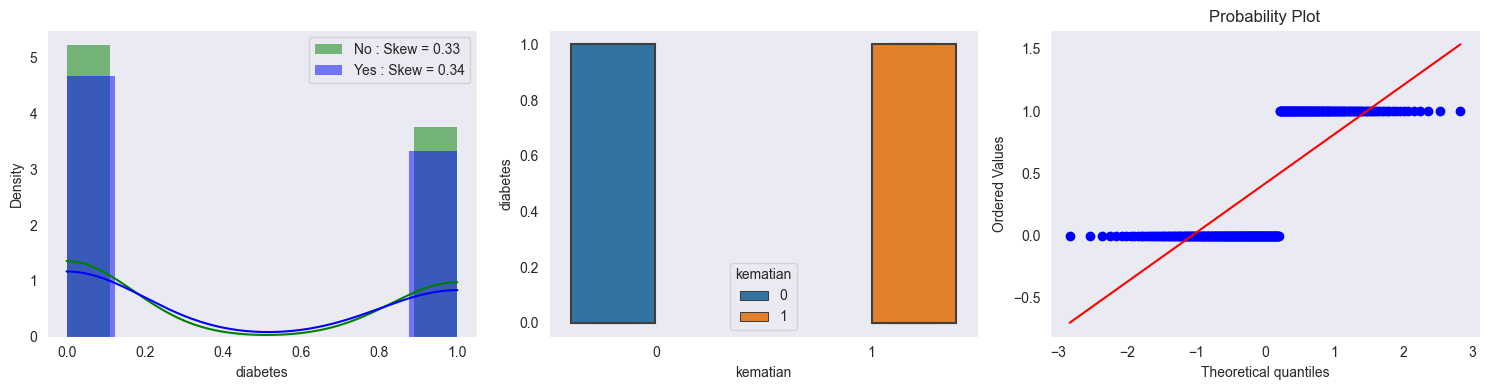

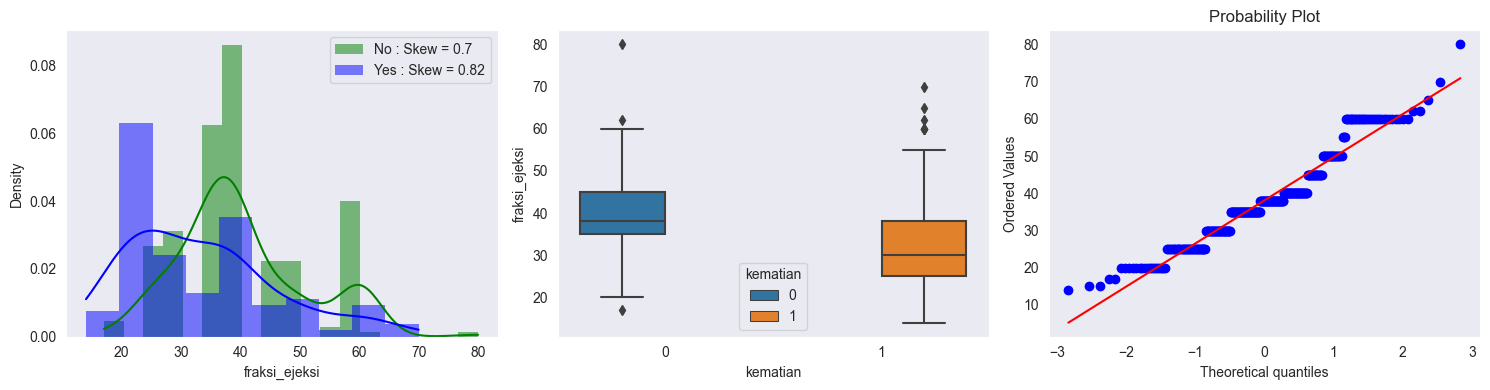

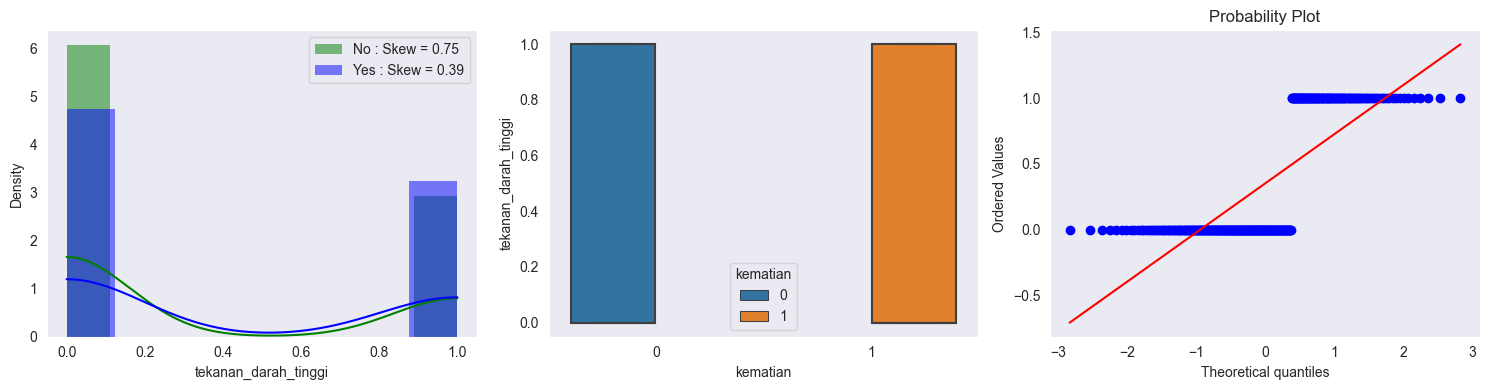

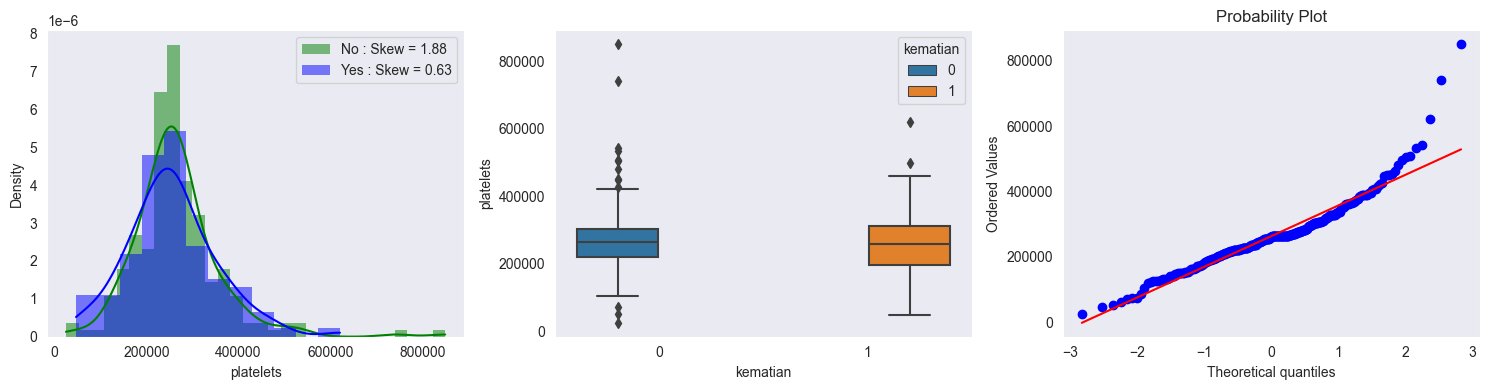

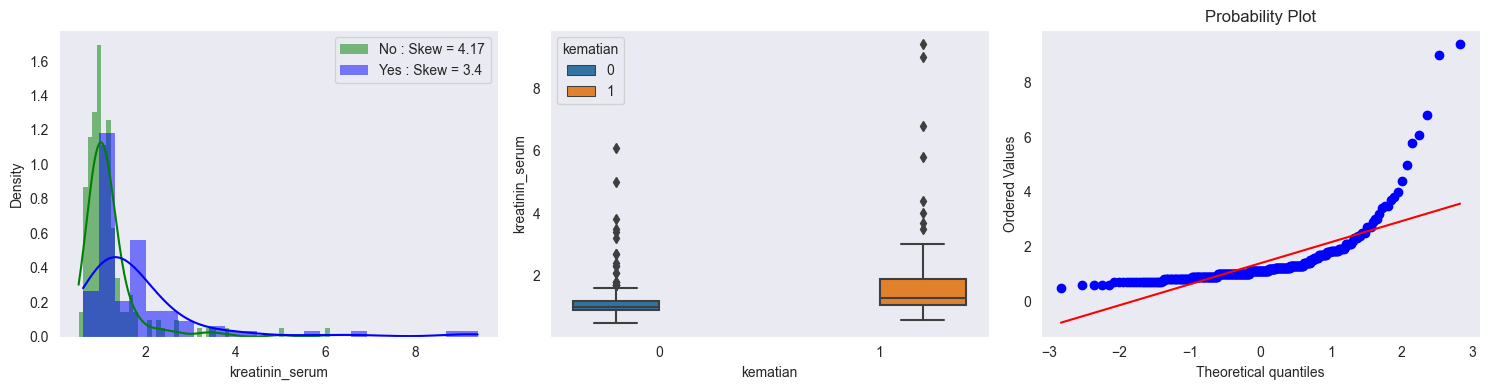

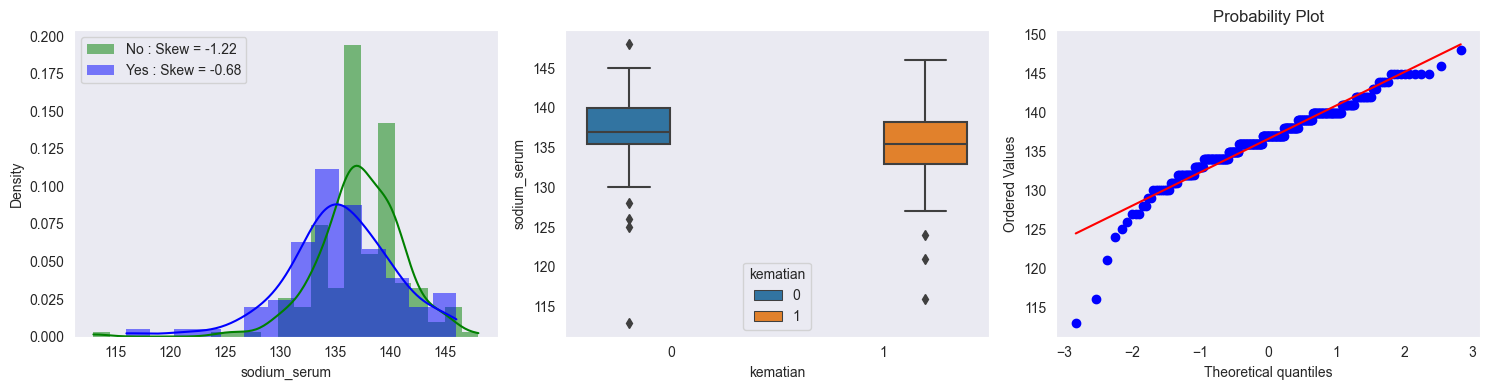

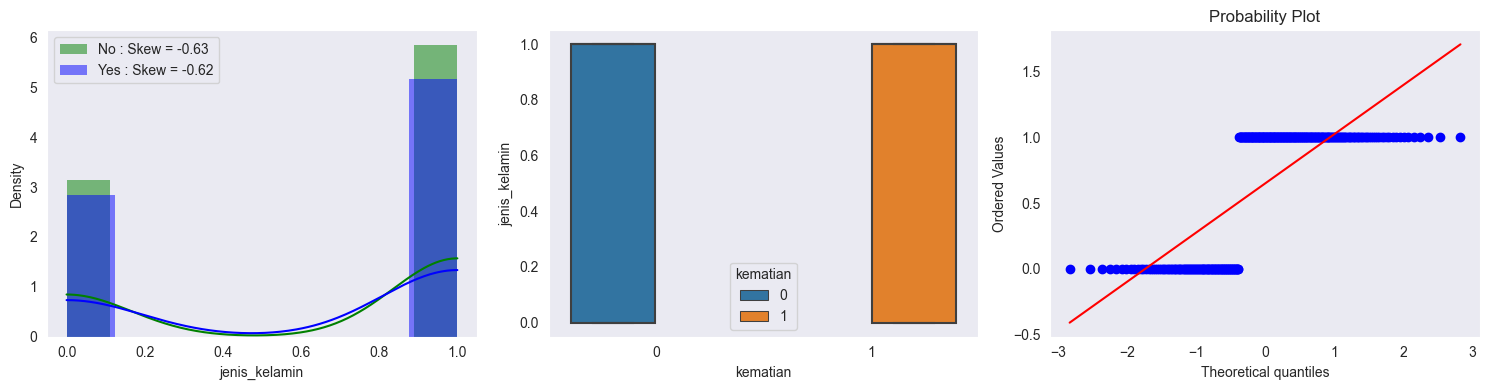

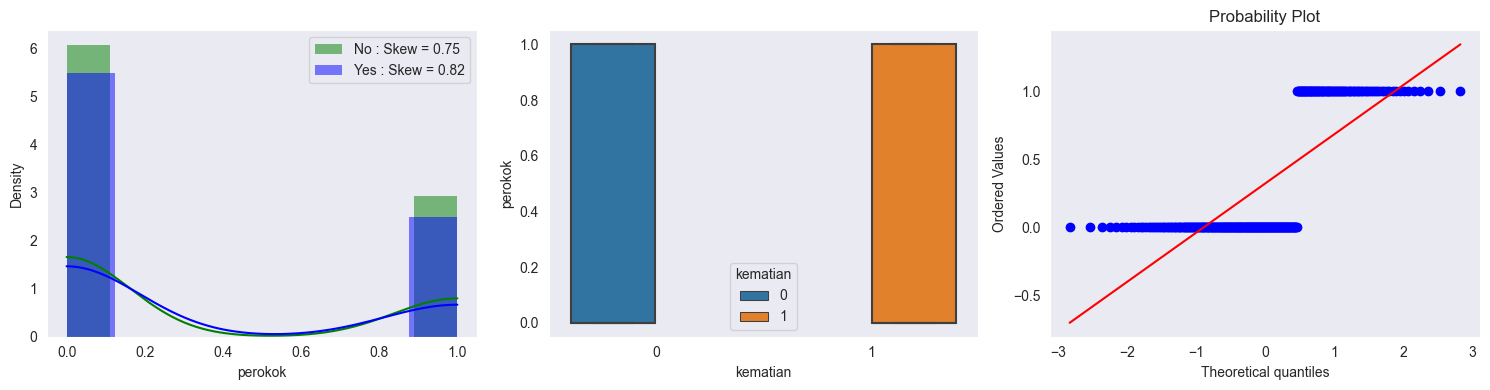

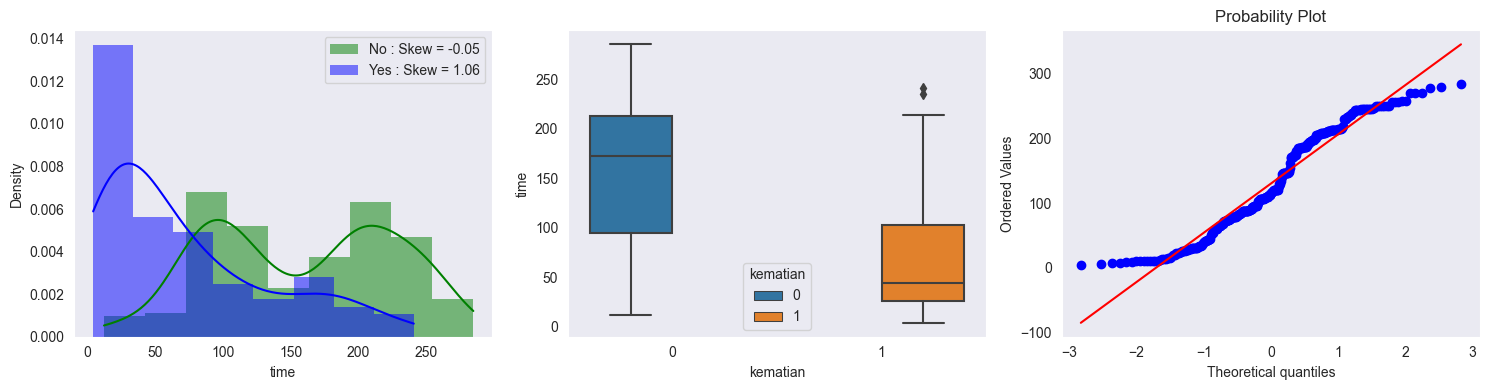

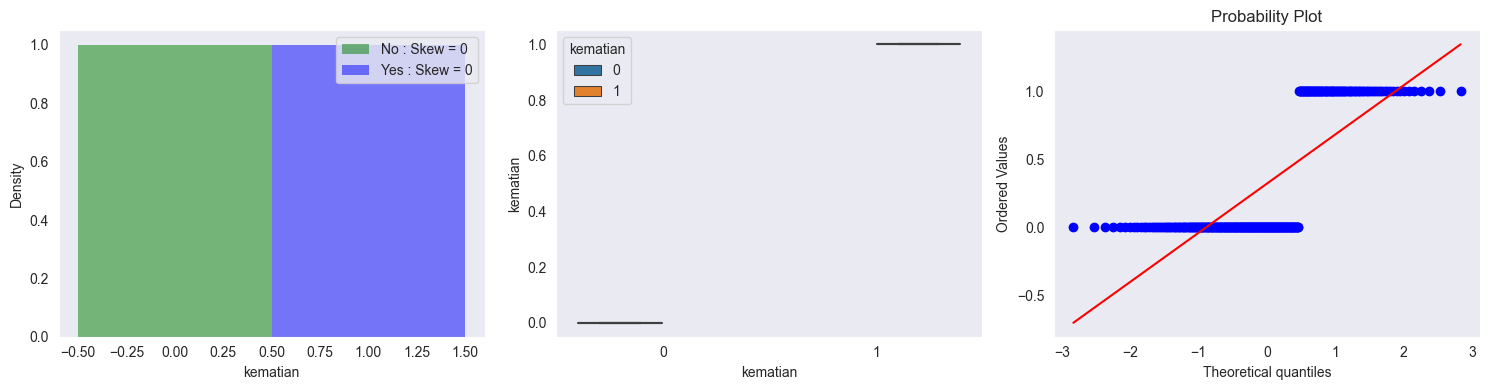

<Figure size 640x480 with 0 Axes>

In [21]:
visualisasi_distribusi_data(df_copy,df_copy.columns.values)# Save Plot

# Save Plot
plt.savefig("visualisasi_distribusi.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Correlation of each columns and Visualization
### Correlation of each columns and

In [22]:
df_copy.corr()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
usia,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinin_fosfokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
fraksi_ejeksi,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
tekanan_darah_tinggi,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
kreatinin_serum,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
sodium_serum,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
jenis_kelamin,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


### Visualization of each columns

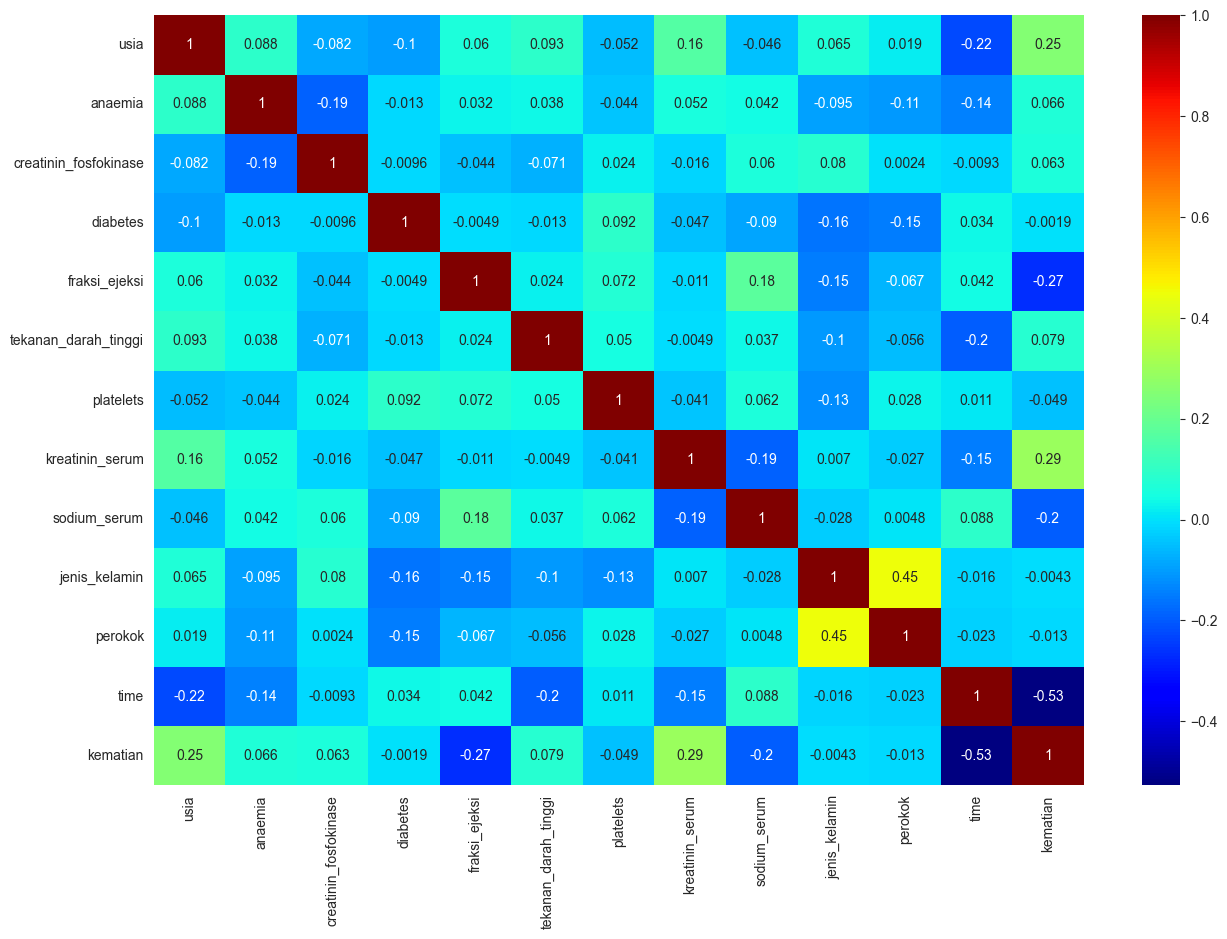

In [23]:
corr = df_copy.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True,cmap='jet');

# Save Plot
plt.savefig("corr.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### visualization of death rates

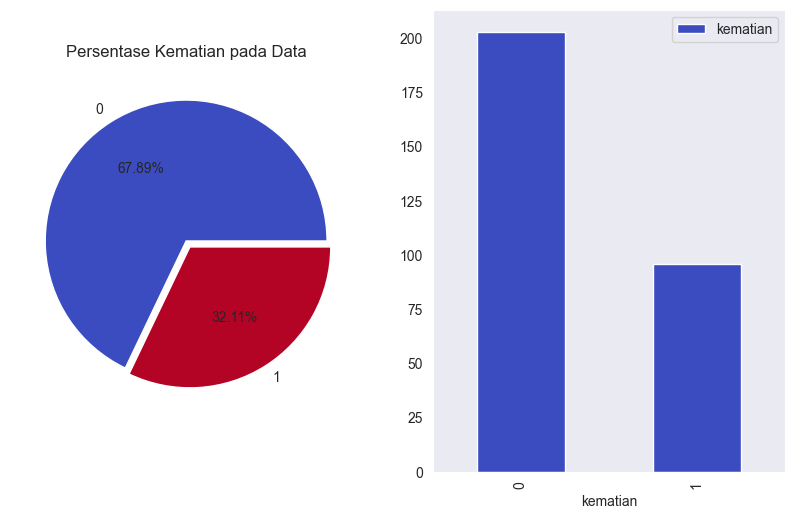

In [24]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

# persentase "kematian"
df['kematian'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='coolwarm',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Persentase Kematian pada Data')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df_copy.groupby('kematian').agg({'kematian':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='coolwarm'
)

# Save Plot
plt.savefig("kematian.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

# 6. DATA PREPROCESSING
## - Scaling and Splitting Data
### a. Scaling Data

In [25]:
a = [i for i in df_copy.columns if i != 'kematian']

In [26]:
scaler = StandardScaler()
df_copy[a] = scaler.fit_transform(df_copy[a])
df_copy.head()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1


### b. Splitting Data

In [27]:
X = df_copy.drop('kematian', axis=1)
y = df_copy['kematian']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


## - Train - Test Data Set-up

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=325)

# 7. PENDEFINISIAN MODEL
## - Random Forest Classifier

In [29]:
mdl1 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=random_state)

## - Logistic Regression Classifier

In [30]:
mdl2= BaggingClassifier(LogisticRegression(random_state=random_state, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = random_state)

## - XGBooster Classifier

In [31]:
mdl3= XGBClassifier(verbosity = 0)

## - Gradient Booster Classifier

In [32]:
mdl4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=1, random_state=3)

## - Extra Trees Classifier

In [33]:
mdl9=ExtraTreesClassifier(random_state=random_state)

## - KNN Classifier

In [34]:
mdl11 = KNeighborsClassifier(n_neighbors=16)

## - SVM Classifier

In [35]:
mdl13 = svm.SVC(kernel='linear')

# 8. EVALUASI MODEL
## - Evaluation model without using SMOTE
### a. Random Forest Classifier

In [36]:
mdl1.fit(X_train, y_train)

y_pred1 = mdl1.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred1)

print(classification_report(y_test,y_pred1))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Random Forest Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred1),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred1),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred1),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred1),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        62
           1       0.74      0.50      0.60        28

    accuracy                           0.79        90
   macro avg       0.77      0.71      0.73        90
weighted avg       0.78      0.79      0.78        90

 Ringkasan Evaluasi Model Random Forest Classifier 
Akurasi :  0.7889 
Presisi :  0.7368 
Recall :  0.5 
F1 Score :  0.5957 


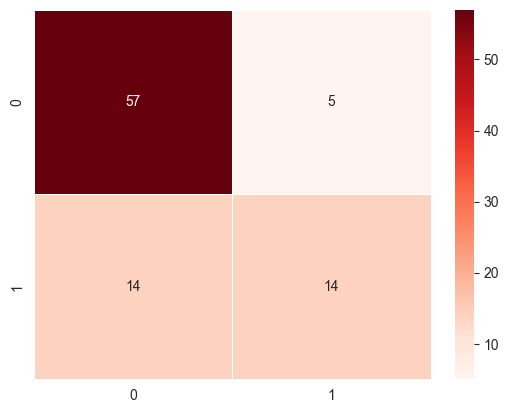

In [37]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("rf.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### b. Logistic Regression Classifier

In [38]:
mdl2.fit(X_train, y_train)

y_pred2 = mdl2.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred2)

print(classification_report(y_test,y_pred2))

#Ringkasan Evaluasi Model Logistic Regression Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Logistic Regression Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred2),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred2),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred2),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred2),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90

 Ringkasan Evaluasi Model Logistic Regression Classifier 
Akurasi :  0.8111 
Presisi :  0.7895 
Recall :  0.5357 
F1 Score :  0.6383 


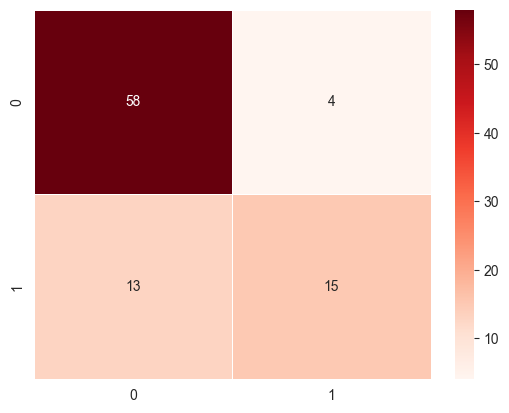

In [39]:
cm2= confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("logreg.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### c. XGBooster Classifier

In [40]:
mdl3.fit(X_train, y_train)

y_pred3 = mdl3.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred3)

print(classification_report(y_test,y_pred3))

#Ringkasan Evaluasi Model XGBooster Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model XGBooster Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred3),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred3),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred3),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred3),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        62
           1       0.64      0.64      0.64        28

    accuracy                           0.78        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.78      0.78      0.78        90

 Ringkasan Evaluasi Model XGBooster Classifier 
Akurasi :  0.7778 
Presisi :  0.6429 
Recall :  0.6429 
F1 Score :  0.6429 


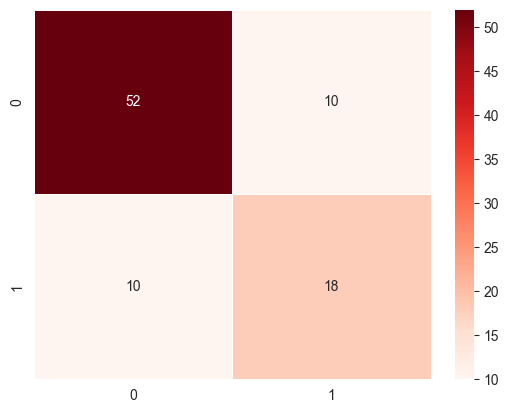

In [41]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("xgboost.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### d. Gradient Booster Classifier

In [42]:
mdl4.fit(X_train, y_train)

y_pred4 = mdl4.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred4)

print(classification_report(y_test,y_pred4))

#Ringkasan Evaluasi Model Gradient Booster Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Gradient Booster Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred4),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred4),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred4),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred4),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        62
           1       0.71      0.61      0.65        28

    accuracy                           0.80        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.79      0.80      0.80        90

 Ringkasan Evaluasi Model Gradient Booster Classifier 
Akurasi :  0.8 
Presisi :  0.7083 
Recall :  0.6071 
F1 Score :  0.6538 


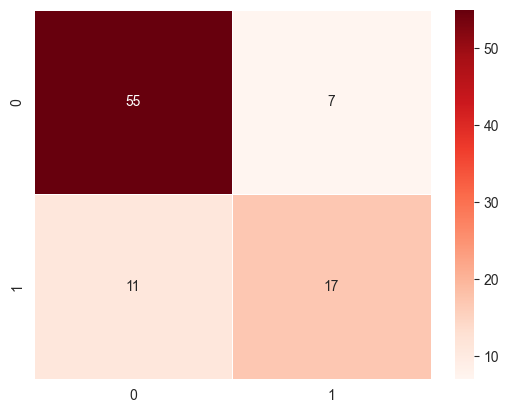

In [43]:
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("gb.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### e. Extra Trees Classifier

In [44]:
mdl9.fit(X_train, y_train)

y_pred9 = mdl9.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred9)

print(classification_report(y_test,y_pred9))

#Ringkasan Evaluasi Model Extra Trees Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Extra Trees Classifier', normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred9),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred9),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred9),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred9),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        62
           1       0.68      0.46      0.55        28

    accuracy                           0.77        90
   macro avg       0.74      0.68      0.70        90
weighted avg       0.76      0.77      0.75        90

 Ringkasan Evaluasi Model Extra Trees Classifier 
Akurasi :  0.7667 
Presisi :  0.6842 
Recall :  0.4643 
F1 Score :  0.5532 


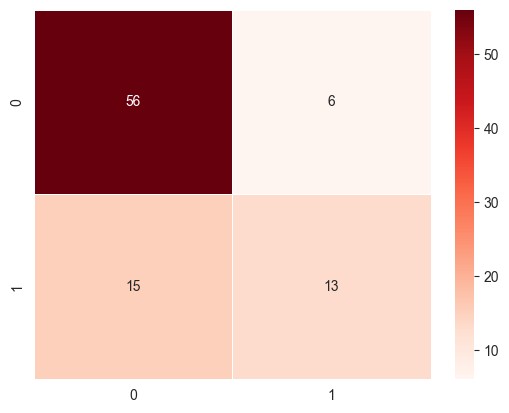

In [45]:
cm9 = confusion_matrix(y_test, y_pred9)
sns.heatmap(cm9, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("etc.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### f. KNN Classifier

In [46]:
mdl11.fit(X_train, y_train)

y_pred11 = mdl11.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred11)

print(classification_report(y_test,y_pred11))

#Ringkasan Evaluasi Model KNN Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model KNN Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred11),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred11),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred11),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred11),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        62
           1       0.60      0.11      0.18        28

    accuracy                           0.70        90
   macro avg       0.65      0.54      0.50        90
weighted avg       0.67      0.70      0.62        90

 Ringkasan Evaluasi Model KNN Classifier 
Akurasi :  0.7 
Presisi :  0.6 
Recall :  0.1071 
F1 Score :  0.1818 


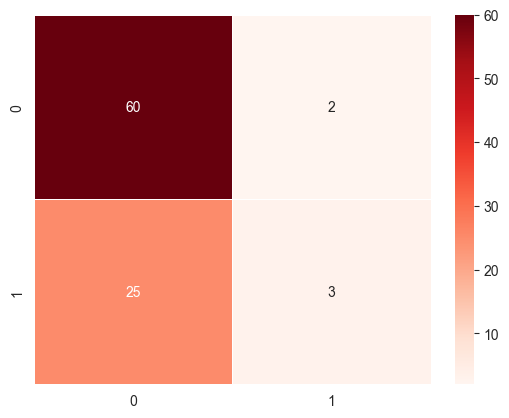

In [47]:
cm11 = confusion_matrix(y_test, y_pred11)
sns.heatmap(cm11, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("knn.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### g. SVM Classifier

In [48]:
mdl13.fit(X_train, y_train)

y_pred13 = mdl13.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred13)

print(classification_report(y_test,y_pred13))

#Ringkasan Evaluasi Model SVM Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model SVM Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred13),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred13),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred13),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred13),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        62
           1       0.74      0.61      0.67        28

    accuracy                           0.81        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.81      0.81      0.81        90

 Ringkasan Evaluasi Model SVM Classifier 
Akurasi :  0.8111 
Presisi :  0.7391 
Recall :  0.6071 
F1 Score :  0.6667 


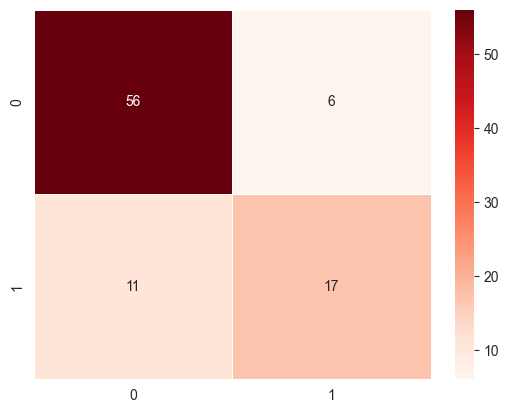

In [49]:
cm13 = confusion_matrix(y_test, y_pred13)
sns.heatmap(cm13, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("svm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## - Evaluation model using SMOTE
### a. Data Preprocessing - SMOTE

In [50]:
smote_method = SMOTE()
X_s, y_s = smote_method.fit_resample(X, y)

In [51]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, stratify = y_s, test_size=0.3, random_state=5)

### b. Model Definition - SMOTE
#### 1. Random Forest Classifier

In [52]:
mdl5 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=random_state)

#### 2. Logistic Regression Classifie

In [53]:
mdl6= BaggingClassifier(LogisticRegression(random_state=random_state, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = random_state)

#### 3. XGBooster Classifier

In [54]:
mdl7= XGBClassifier(verbosity = 0)

#### 4. Gradient Booster Classifier

In [55]:
mdl8 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=3)

#### 5. Extra Trees Classifier

In [56]:
mdl10=ExtraTreesClassifier(random_state=random_state)

#### 6. KNN Classifier

In [57]:
mdl12 = KNeighborsClassifier(n_neighbors=16)

#### 7. SVM Classifier

In [58]:
mdl14 = svm.SVC(kernel='linear')

### c. Model Evaluation - SMOTE

#### 1. Random Forest Classifier

In [59]:
mdl5.fit(X_train_s, y_train_s)

y_pred5 = mdl5.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred5)

print(classification_report(y_test_s,y_pred5))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Random Forest Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred5),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred5),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred5),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred5),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        61
           1       0.88      0.85      0.87        61

    accuracy                           0.87       122
   macro avg       0.87      0.87      0.87       122
weighted avg       0.87      0.87      0.87       122

 Ringkasan Evaluasi Model Random Forest Classifier 
Akurasi :  0.8689 
Presisi :  0.8814 
Recall :  0.8525 
F1 Score :  0.8667 


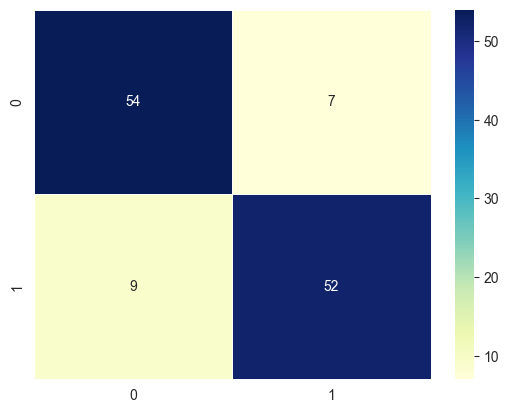

In [60]:
cm5 = confusion_matrix(y_test_s, y_pred5)
sns.heatmap(cm5, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("smote_rf.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#### 2. Logistic Regression Classifier¶

In [61]:
mdl6.fit(X_train_s, y_train_s)

y_pred6 = mdl6.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred6)

print(classification_report(y_test_s,y_pred6))

#Ringkasan Evaluasi Model Logistic Regression Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Logistic Regression Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred6),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred6),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred6),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred6),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        61
           1       0.80      0.80      0.80        61

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.80       122
weighted avg       0.80      0.80      0.80       122

 Ringkasan Evaluasi Model Logistic Regression Classifier 
Akurasi :  0.8033 
Presisi :  0.8033 
Recall :  0.8033 
F1 Score :  0.8033 


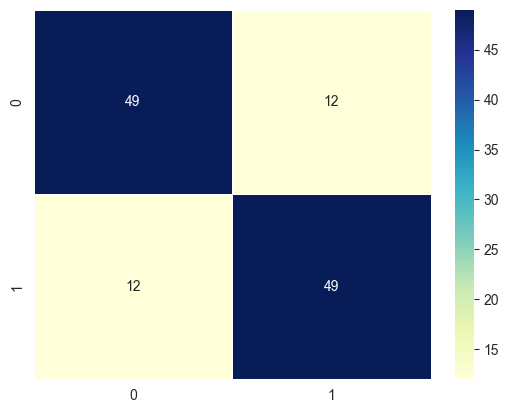

In [62]:
cm6 = confusion_matrix(y_test_s, y_pred6)
sns.heatmap(cm6, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("smote_logreg.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#### 3. XGBooster Classifier

In [63]:
mdl7.fit(X_train_s, y_train_s)

y_pred7 = mdl7.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred7)

print(classification_report(y_test_s,y_pred7))

#Ringkasan Evaluasi Model XGBooster Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model XGBooster Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred7),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred7),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred7),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred7),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        61
           1       0.80      0.92      0.85        61

    accuracy                           0.84       122
   macro avg       0.85      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122

 Ringkasan Evaluasi Model XGBooster Classifier 
Akurasi :  0.8443 
Presisi :  0.8 
Recall :  0.918 
F1 Score :  0.855 


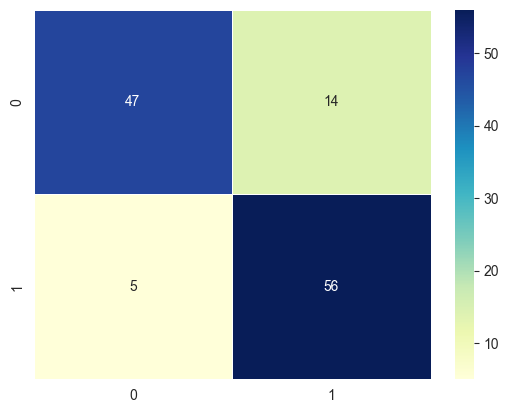

In [64]:
cm7 = confusion_matrix(y_test_s, y_pred7)
sns.heatmap(cm7, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("smote_xgboost.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#### 4. Gradient Booster Classifier

In [65]:
mdl8.fit(X_train_s, y_train_s)

y_pred8 = mdl8.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred8)

print(classification_report(y_test_s,y_pred8))

#Ringkasan Evaluasi Model Gradient Booster Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Gradient Booster Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred8),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred8),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred8),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred8),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        61
           1       0.82      0.89      0.85        61

    accuracy                           0.84       122
   macro avg       0.85      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122

 Ringkasan Evaluasi Model Gradient Booster Classifier 
Akurasi :  0.8443 
Presisi :  0.8182 
Recall :  0.8852 
F1 Score :  0.8504 


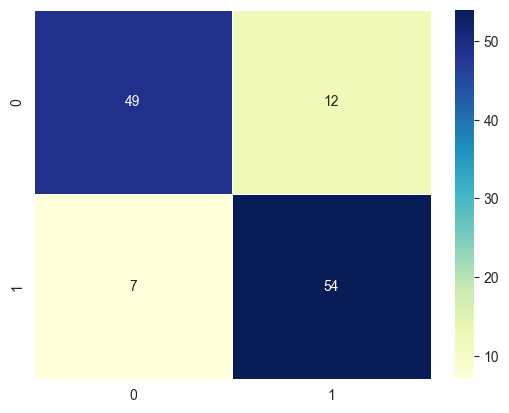

In [66]:
cm8 = confusion_matrix(y_test_s, y_pred8)
sns.heatmap(cm8, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("smote_gb.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#### 5. Extra Trees Classifier

In [67]:
mdl10.fit(X_train_s, y_train_s)

y_pred10 = mdl10.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred10)

print(classification_report(y_test_s,y_pred10))

#Ringkasan Evaluasi Model Extra Trees Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Extra Trees Classifier', normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred10),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred10),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred10),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred10),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        61
           1       0.87      0.90      0.89        61

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122

 Ringkasan Evaluasi Model Extra Trees Classifier 
Akurasi :  0.8852 
Presisi :  0.873 
Recall :  0.9016 
F1 Score :  0.8871 


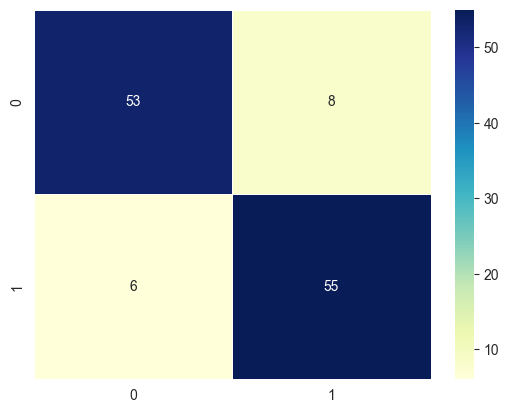

In [68]:
cm10 = confusion_matrix(y_test_s, y_pred10)
sns.heatmap(cm10, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("smote_etc.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#### 6. KNN Classifier

In [69]:
mdl12.fit(X_train_s, y_train_s)

y_pred12 = mdl12.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred12)

print(classification_report(y_test_s,y_pred12))

#Ringkasan Evaluasi Model KNN Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model KNN Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred12),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred12),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred12),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred12),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        61
           1       0.81      0.70      0.75        61

    accuracy                           0.77       122
   macro avg       0.78      0.77      0.77       122
weighted avg       0.78      0.77      0.77       122

 Ringkasan Evaluasi Model KNN Classifier 
Akurasi :  0.7705 
Presisi :  0.8113 
Recall :  0.7049 
F1 Score :  0.7544 


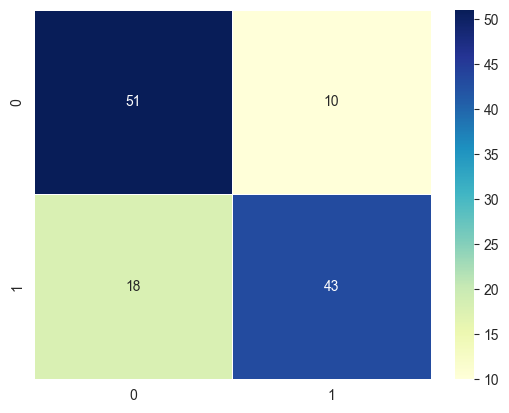

In [70]:
cm12 = confusion_matrix(y_test_s, y_pred12)
sns.heatmap(cm12, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("smote_knn.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#### 7. SVM Classifier

In [71]:
mdl14.fit(X_train_s, y_train_s)

y_pred14 = mdl14.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred14)

print(classification_report(y_test_s,y_pred14))

#Ringkasan Evaluasi Model SVM Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model SVM Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred14),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred14),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred14),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred14),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        61
           1       0.84      0.79      0.81        61

    accuracy                           0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122

 Ringkasan Evaluasi Model SVM Classifier 
Akurasi :  0.8197 
Presisi :  0.8421 
Recall :  0.7869 
F1 Score :  0.8136 


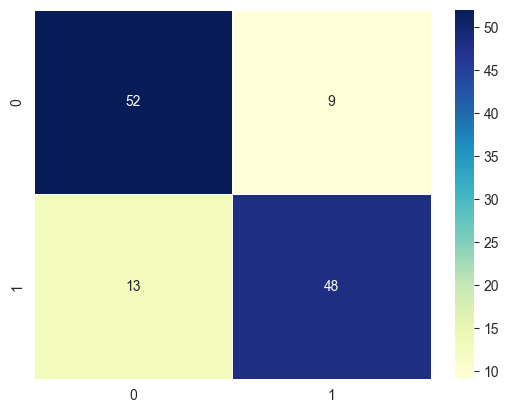

In [72]:
cm14 = confusion_matrix(y_test_s, y_pred14)
sns.heatmap(cm14, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("smote_svm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

# 9. MODEL INFERENCE
## - Check Numeric of Prediction
### a. Usia

In [73]:
df_usia_num = pd.DataFrame(
    {
        "usia":df["usia"].unique(),
        "usia_num":df["usia"].unique()
    }
).sort_values(by="usia_num", ascending=True)

df_usia_num = df_usia_num.set_index(keys="usia_num",drop=True)
df_usia_num

,usia
usia_num,
40.000,40.000
41.000,41.000
42.000,42.000
43.000,43.000
44.000,44.000
45.000,45.000
46.000,46.000
47.000,47.000
48.000,48.000


### b. Anaemia

In [74]:
df_anaem = pd.DataFrame(
    {
        "anaemia":df["anaemia"].unique(),
        "anaem_num":df["anaemia"].unique()
    }
).sort_values(by="anaem_num", ascending=True)

df_anaem = df_anaem.set_index(keys="anaem_num",drop=True)
df_anaem

,anaemia
anaem_num,
0,0
1,1


### c. Creatinin Fosfokinase

In [75]:
df_crefos = pd.DataFrame(
    {
        "creatinin_fosfokinase":df["creatinin_fosfokinase"].unique(),
        "crefos_num":df["creatinin_fosfokinase"].unique()
    }
).sort_values(by="crefos_num", ascending=True)

df_crefos = df_crefos.set_index(keys="crefos_num",drop=True)
df_crefos

,creatinin_fosfokinase
crefos_num,
23,23
30,30
47,47
52,52
53,53
...,...
4540,4540
5209,5209
5882,5882


### d. Diabetes

In [76]:
df_diabet = pd.DataFrame(
    {
        "diabetes":df["diabetes"].unique(),
        "diabet_num":df["diabetes"].unique()
    }
).sort_values(by="diabet_num", ascending=True)

df_diabet = df_diabet.set_index(keys="diabet_num",drop=True)
df_diabet

,diabetes
diabet_num,
0,0
1,1


### e. Fraksi Ejeksi

In [77]:
df_frajek = pd.DataFrame(
    {
        "fraksi_ejeksi":df["fraksi_ejeksi"].unique(),
        "frejek_num":df["fraksi_ejeksi"].unique()
    }
).sort_values(by="frejek_num", ascending=True)

df_frajek = df_frajek.set_index(keys="frejek_num",drop=True)
df_frajek

,fraksi_ejeksi
frejek_num,
14,14
15,15
17,17
20,20
25,25
30,30
35,35
38,38
40,40


### f. Tekanan Darah Tinggi

In [78]:
df_tekdar = pd.DataFrame(
    {
        "tekanan_darah_tinggi":df["tekanan_darah_tinggi"].unique(),
        "tekdar_num":df["tekanan_darah_tinggi"].unique()
    }
).sort_values(by="tekdar_num", ascending=True)

df_tekdar = df_tekdar.set_index(keys="tekdar_num",drop=True)
df_tekdar

,tekanan_darah_tinggi
tekdar_num,
0,0
1,1


### g. Platelets

In [79]:
df_plat = pd.DataFrame(
    {
        "platelets":df["platelets"].unique(),
        "plat_num":df["platelets"].unique()
    }
).sort_values(by="plat_num", ascending=True)

df_plat = df_plat.set_index(keys="plat_num",drop=True)
df_plat

,platelets
plat_num,
25100.0,25100.0
47000.0,47000.0
51000.0,51000.0
62000.0,62000.0
70000.0,70000.0
...,...
533000.0,533000.0
543000.0,543000.0
621000.0,621000.0


### h. Kreatinin Serum

In [80]:
df_kreser = pd.DataFrame(
    {
        "kreatinin_serum":df["kreatinin_serum"].unique(),
        "kreser_num":df["kreatinin_serum"].unique()
    }
).sort_values(by="kreser_num", ascending=True)

df_kreser = df_kreser.set_index(keys="kreser_num",drop=True)
df_kreser

,kreatinin_serum
kreser_num,
0.50,0.50
0.60,0.60
0.70,0.70
0.75,0.75
0.80,0.80
0.90,0.90
1.00,1.00
1.10,1.10
1.18,1.18


### i. Sodium Serum

In [81]:
df_sodser = pd.DataFrame(
    {
        "sodium_serum":df["sodium_serum"].unique(),
        "sodser_num":df["sodium_serum"].unique()
    }
).sort_values(by="sodser_num", ascending=True)

df_sodser = df_sodser.set_index(keys="sodser_num",drop=True)
df_sodser

,sodium_serum
sodser_num,
113,113
116,116
121,121
124,124
125,125
126,126
127,127
128,128
129,129


### j. Jenis Kelamin

In [82]:
df_jkel = pd.DataFrame(
    {
        "jenis_kelamin":df["jenis_kelamin"].unique(),
        "jkel_num":df["jenis_kelamin"].unique()
    }
).sort_values(by="jkel_num", ascending=True)

df_jkel = df_jkel.set_index(keys="jkel_num",drop=True)
df_jkel

,jenis_kelamin
jkel_num,
0,0
1,1


### k. Perokok

In [83]:
df_perokok = pd.DataFrame(
    {
        "perokok":df["perokok"].unique(),
        "perokok_num":df["perokok"].unique()
    }
).sort_values(by="perokok_num", ascending=True)

df_perokok = df_perokok.set_index(keys="perokok_num",drop=True)
df_perokok

,perokok
perokok_num,
0,0
1,1


In [84]:
### l. Time

In [85]:
df_ttime = pd.DataFrame(
    {
        "time":df["time"].unique(),
        "time_num":df["time"].unique()
    }
).sort_values(by="time_num", ascending=True)

df_ttime = df_ttime.set_index(keys="time_num",drop=True)
df_ttime

,time
time_num,
4,4
6,6
7,7
8,8
10,10
...,...
270,270
271,271
278,278


## - Data Type Check and Inference Model Trial
### a. Data Type Check

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   usia                   299 non-null    float64
 1   anaemia                299 non-null    int64  
 2   creatinin_fosfokinase  299 non-null    int64  
 3   diabetes               299 non-null    int64  
 4   fraksi_ejeksi          299 non-null    int64  
 5   tekanan_darah_tinggi   299 non-null    int64  
 6   platelets              299 non-null    float64
 7   kreatinin_serum        299 non-null    float64
 8   sodium_serum           299 non-null    int64  
 9   jenis_kelamin          299 non-null    int64  
 10  perokok                299 non-null    int64  
 11  time                   299 non-null    int64  
 12  kematian               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### b. Inference Model Trial

In [87]:
usia=float(input('umur :'))
anaemia=int(input('anaemia :'))
creatinin_fosfokinase=int(input('creatinin fosfokinase :'))
diabetes=int(input('diabetes :'))
fraksi_ejeksi=int(input('fraksi ejeksi :'))
tekanan_darah_tinggi=int(input('tekanan darah tinggi :'))
platelets=float(input('platelets : '))
kreatinin_serum=float(input('kreatin serum :'))
sodium_serum=int(input('sodium serum :'))
jenis_kelamin=int(input('jenis kelamin :'))
perokok=int(input('perokok :'))
time=int(input('time :'))





x_input=[[
    usia,
    anaemia,
    creatinin_fosfokinase,
    diabetes,
    fraksi_ejeksi,
    tekanan_darah_tinggi,
    platelets,
    kreatinin_serum,
    sodium_serum,
    jenis_kelamin,
    perokok,
    time
]]

x_input=scaler.fit_transform(x_input)
y_output=mdl10.predict(x_input)
if y_output==0:
    print('tidak meninggal')
else:
    print('meninggal')

umur :78
anaemia :1
creatinin fosfokinase :23
diabetes :1
fraksi ejeksi :38
tekanan darah tinggi :1
platelets : 25100
kreatin serum :0
sodium serum :113
jenis kelamin :1
perokok :1
time :4
meninggal


## - Convert to Pickle - ExtraTreesClassifier Model

In [88]:
pickle.dump(mdl10,open('model_ETC.pkl','wb'))

# 10. KESIMPULAN
Dari analisis yang telah dilakukan, dapat ditarik beberapa kesimpulan:

1. Sebesar 67.89% kematian terjadi akibat penyakit jantung. Penyakit jantung sendiri banyak terjadi untuk pasien berjenis kelamin laki-laki.
2. Pada dataset ini dilakukan evaluasi model dengan 7 model pembanding, antara lain: Random Forest Classifier, Logistic Regression, XGBooster classifier, Gradient Booster Classifier, Extra Trees Classifier, K-Nearest Neighbors Classifier, dan Support Vector Machine.
3. Model Extra Trees Classifier mendapatkan akurasi tertinggi untuk dataset ini, yaitu sebesar 88.52% sehingga model tersebut paling tepat untuk memprediksi keselamatan pasien dari penyakit jantung.